In [1]:
# pip install --pre torch torchvision  --index-url https://download.pytorch.org/whl/nightly/cpu
# pip install torchvision

import torch, torchvision
from torchvision import datasets, transforms
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
torch.__version__

'2.5.0.dev20240911'

In [38]:
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
torch.set_default_device(device)
device

'mps'

In [39]:

# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the tensor with mean=0.5 and std=0.5
])

# Download the training and test datasets
train_dataset = datasets.MNIST(root='/tmp/data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='/tmp/data', train=False, download=True, transform=transform)


train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /tmp/data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

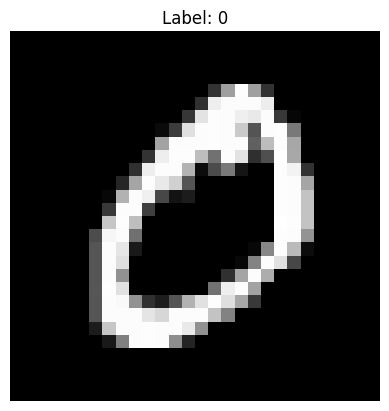

In [40]:

im = train_dataset.data[1]
label = train_dataset.targets[1]
# plt.imshow(im.squeeze().numpy(),cmap='gray')
im2 = im[0].numpy() if len(im.shape) > 2 else im.numpy()

# Plot the image
plt.imshow(im2, cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off')  # Hide axes
# plt.show()

In [41]:
# Define a simple feedforward neural network with:
# An input layer with 784 units (28x28 pixels)
# One hidden layer with 128 units and ReLU activation
# An output layer with 10 units (for each digit class)

model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

model(torch.tensor(im.numpy(), dtype=torch.float32).reshape(784))

tensor([-36.2869,   4.7833, -10.9329,  37.4291,  -9.3662,  -1.4147, -17.4438,
        -25.2653,  19.3014, -34.5444], device='mps:0',
       grad_fn=<LinearBackward0>)

In [42]:
model = model.to(device)

In [45]:
%time
def evaluate(model):
    model.eval()
    data = torch.tensor(test_dataset.data.numpy(), dtype=torch.float32).reshape(-1,784)
    preds = torch.argmax(model(data.to(device)), dim=1)
    labels = test_dataset.targets.to(device)
    print(data.shape, labels.shape, preds.shape)
    acc = torch.mean(1.0* (preds == labels))
    return(acc)
evaluate(model)
    

CPU times: user 1 μs, sys: 1e+03 ns, total: 2 μs
Wall time: 3.81 μs
torch.Size([10000, 784]) torch.Size([10000]) torch.Size([10000])


tensor(0.0964, device='mps:0')

In [46]:
torch.tensor(test_dataset.data.numpy(), dtype=torch.float32).shape

torch.Size([10000, 28, 28])

In [47]:

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

In [53]:
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=16)
losses = []
# device = torch.torch
for data, labels in tqdm(dataloader):
    data = data.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    preds = model(data.reshape(-1,784))
    loss = criterion(preds, labels)
    # print(preds, labels)
    # print(loss)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()

  0%|          | 0/3750 [00:00<?, ?it/s]